# Importing Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [77]:
df = pd.read_csv("marketing_campaign.csv")

In [78]:
df.shape

(2240, 29)

In [79]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Setting Display options to ensure feature name visibility

In [81]:
pd.set_option('display.max_columns',None)

# Warning Suppression

In [82]:
import warnings
warnings.filterwarnings('ignore')

# Drop ID Feature from the dataset

In [83]:
df=df.drop(['ID'],axis=1)

# Defining Target and Independent Features

In [84]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: No Response || 1: Response)')

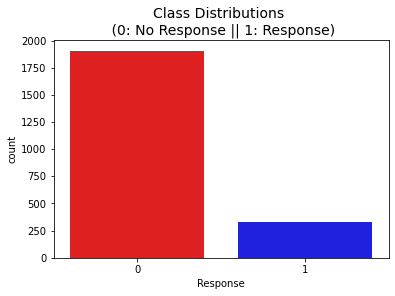

In [85]:
colors = ["Red", "Blue"]

sns.countplot('Response', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Response || 1: Response)', fontsize=14)

In [86]:
Y=df[['Response']]
X=df.drop(['Response'],axis=1)

# Get the Response Rate

In [87]:
Y.mean()

Response    0.149107
dtype: float64

# Build Derived Features - Customer Age and Tenure

In [88]:
import datetime
reference_date=datetime.datetime(2022,1,1)
print(reference_date)

2022-01-01 00:00:00


In [89]:
X['Year_Birth']=pd.to_datetime(df['Year_Birth'], format='%Y')
X['Age'] = (reference_date- X['Year_Birth']).astype('timedelta64[Y]')

X['Dt_Customer']=pd.to_datetime(X['Dt_Customer'])
X['Cust_Tenure'] = (reference_date- X['Dt_Customer']).astype('timedelta64[Y]')

X=X.drop(['Year_Birth','Dt_Customer'],axis=1)

In [90]:
X[['Age','Cust_Tenure']].head()

,Age,Cust_Tenure
0,65.0,9.0
1,68.0,7.0
2,57.0,8.0
3,38.0,7.0
4,41.0,7.0


# Split features into Numerical and Categorical

In [91]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [92]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [93]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Income,1974
Kidhome,3
Teenhome,3
Recency,100
MntWines,776


In [94]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

Kidhome                  int64
Teenhome                 int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Cust_Tenure            float64
dtype: object

In [95]:
def data_type_converter(x):
    x=x.astype('object')
    return(x)
cat=cat.apply(lambda x : data_type_converter(x))
cat.dtypes

Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_Tenure            object
dtype: object

In [96]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [97]:
char=pd.concat([char,cat],axis=1,join="inner")

In [98]:
print ("The shape of numerical dataframe :",num.shape)
print ("The shape of categorical datafrme :",char.shape)

The shape of numerical dataframe : (2240, 9)
The shape of categorical datafrme : (2240, 18)


# Outlier Analysis of Numerical Features

In [99]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,53.178125
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,12.008965
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
1%,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,30.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,34.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,38.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,45.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,52.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,63.000000


# Capping and Flooring of outliers

In [100]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [101]:
num=num.apply(lambda x : outlier_cap(x))

In [102]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51770.277076,49.101786,302.909821,26.158482,165.075446,37.351366,26.873688,43.770089,53.118750
std,20728.704775,28.949501,333.316827,39.208270,216.547373,53.985910,40.484302,51.118104,11.689759
min,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,30.000000
1%,7646.520000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,30.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,34.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,38.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,45.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,52.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,63.000000


# Missing Value Handling - Numerical Features

In [103]:
num.isnull().mean()

Income              0.010714
Recency             0.000000
MntWines            0.000000
MntFruits           0.000000
MntMeatProducts     0.000000
MntFishProducts     0.000000
MntSweetProducts    0.000000
MntGoldProds        0.000000
Age                 0.000000
dtype: float64

# Missing Value Handling - Numerical Features (Imputation with Mean)

In [104]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [105]:
num_1.isnull().mean()

Income              0.0
Recency             0.0
MntWines            0.0
MntFruits           0.0
MntMeatProducts     0.0
MntFishProducts     0.0
MntSweetProducts    0.0
MntGoldProds        0.0
Age                 0.0
dtype: float64

# Missing Value Handling - Categorical Features (Remove >25% Missing Rows)

In [112]:
char.isnull().sum()

Education              0
Marital_Status         0
Kidhome                0
Teenhome               0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Cust_Tenure            0
dtype: int64

# Feature Selection - Numerical Features

# Part 1 : Remove Features with 0 Variance

In [108]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_2 = num_1.iloc[:,cols]

In [109]:
num_2.iloc[0]

Income              58138.0
Recency                58.0
MntWines              635.0
MntFruits              88.0
MntMeatProducts       546.0
MntFishProducts       172.0
MntSweetProducts       88.0
MntGoldProds           88.0
Age                    65.0
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [110]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_2),index=num_2.index, columns=num_2.columns).add_suffix('_Rank')
num_binned.head()

,Income_Rank,Recency_Rank,MntWines_Rank,MntFruits_Rank,MntMeatProducts_Rank,MntFishProducts_Rank,MntSweetProducts_Rank,MntGoldProds_Rank,Age_Rank
0,5.0,5.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0
1,4.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0
2,7.0,2.0,7.0,7.0,6.0,7.0,5.0,6.0,6.0
3,1.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0
4,6.0,9.0,4.0,6.0,6.0,6.0,6.0,3.0,1.0


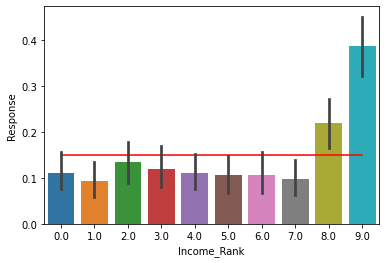

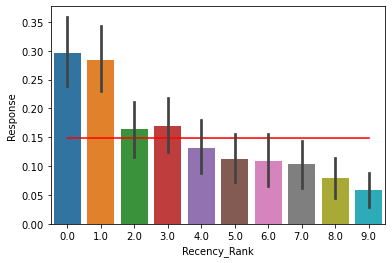

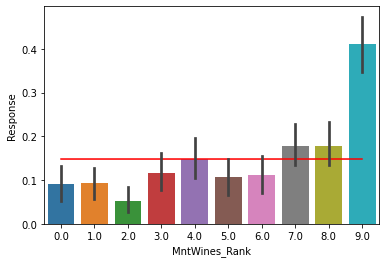

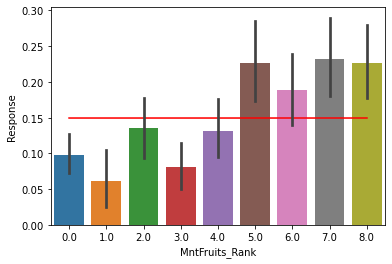

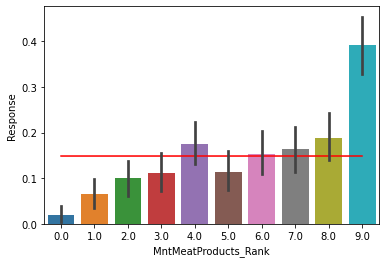

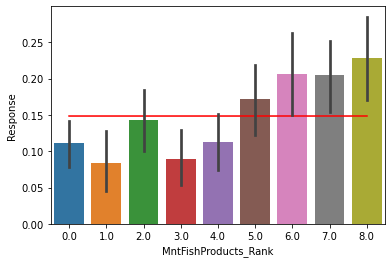

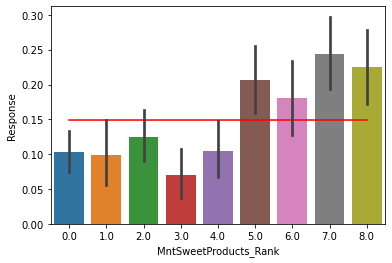

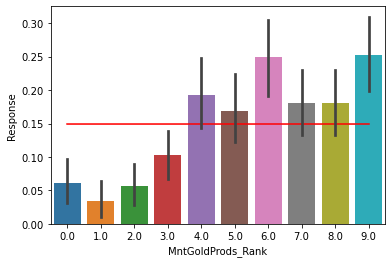

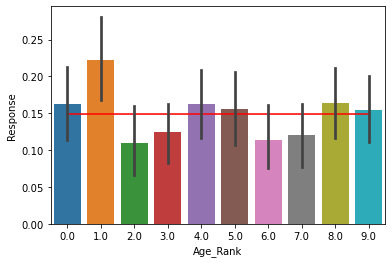

In [111]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Response'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Response",data=X_bin_combined, estimator=mean )
plt.show()

In [113]:
num_droplist=['Age']
num_2=num_2.drop(num_droplist,axis=1)
num_2.shape

(2240, 8)

# Part 3 - Select K Best

In [116]:
num.corr()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
Income,1.000000,0.006334,0.722837,0.534360,0.711634,0.546962,0.546971,0.417751,0.210124
Recency,0.006334,1.000000,0.016333,-0.002311,0.025059,0.001768,0.025108,0.019228,0.019389
MntWines,0.722837,0.016333,1.000000,0.397224,0.595789,0.406142,0.397849,0.397713,0.162467
MntFruits,0.534360,-0.002311,0.397224,1.000000,0.573529,0.600730,0.580207,0.401043,0.015082
MntMeatProducts,0.711634,0.025059,0.595789,0.573529,1.000000,0.597604,0.557070,0.379081,0.038573
MntFishProducts,0.546962,0.001768,0.406142,0.600730,0.597604,1.000000,0.591919,0.433327,0.043282
MntSweetProducts,0.546971,0.025108,0.397849,0.580207,0.557070,0.591919,1.000000,0.370264,0.020212
MntGoldProds,0.417751,0.019228,0.397713,0.401043,0.379081,0.433327,0.370264,1.000000,0.063750
Age,0.210124,0.019389,0.162467,0.015082,0.038573,0.043282,0.020212,0.063750,1.000000


In [115]:
select_features_df_num.iloc[0]

Income             58138.0
MntWines             635.0
MntFruits             88.0
MntMeatProducts      546.0
MntFishProducts      172.0
MntGoldProds          88.0
Name: 0, dtype: float64

# Feature Selection - Categorical Features